In [40]:
# Load the avocado dataset
avocado_data <- read.csv("avocado.csv")


# include conventional and organic avocados
conventional_data <- subset(avocado_data, type == "conventional")
organic_data <- subset(avocado_data, type == "organic")

# t-test to compare the average price of conventional and organic avocados
t.test(conventional_data$AveragePrice, organic_data$AveragePrice)



	Welch Two Sample t-test

data:  conventional_data$AveragePrice and organic_data$AveragePrice
t = -105.58, df = 16619, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5051664 -0.4867517
sample estimates:
mean of x mean of y 
 1.158040  1.653999 


In [41]:
# ANOVA to test for differences in avocado prices across regions
avocado_anova <- aov(AveragePrice ~ region, data = avocado_data)
summary(avocado_anova)


               Df Sum Sq Mean Sq F value Pr(>F)    
region         53  497.5   9.386   69.38 <2e-16 ***
Residuals   18195 2461.4   0.135                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [42]:
# correlation between avocado prices and total volume sold
cor.test(avocado_data$AveragePrice, avocado_data$Total.Volume)


	Pearson's product-moment correlation

data:  avocado_data$AveragePrice and avocado_data$Total.Volume
t = -26.535, df = 18247, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2066832 -0.1787434
sample estimates:
       cor 
-0.1927524 


In [44]:
#contingency table of avocado type and region
cont_table <- table(avocado_data$type, avocado_data$region)
#chi-squared test to test for association between avocado type and region
chisq.test(cont_table)



	Pearson's Chi-squared test

data:  cont_table
X-squared = 0.026372, df = 53, p-value = 1


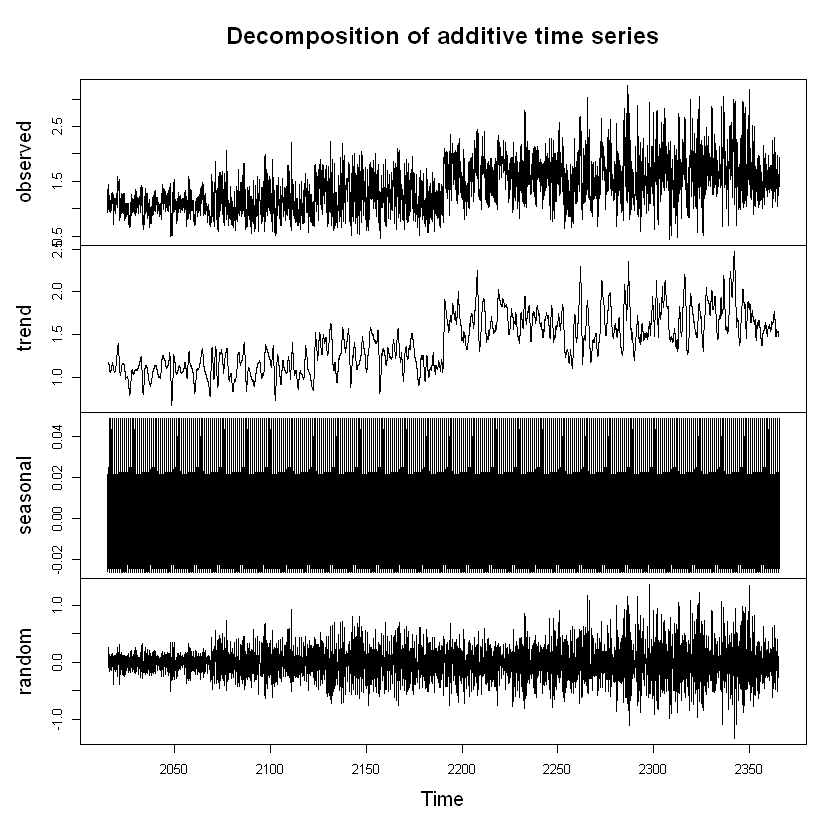

In [45]:
# Convert the Date column to a date format
avocado_data$Date <- as.Date(avocado_data$Date, "%Y-%m-%d")
# time series object of avocado prices
avocado_ts <- ts(avocado_data$AveragePrice, start = c(2015, 1), frequency = 52)
# seasonal decomposition of the time series
avocado_decomp <- decompose(avocado_ts)
# Plot the original time series and the seasonal, trend, and residual components
plot(avocado_decomp)

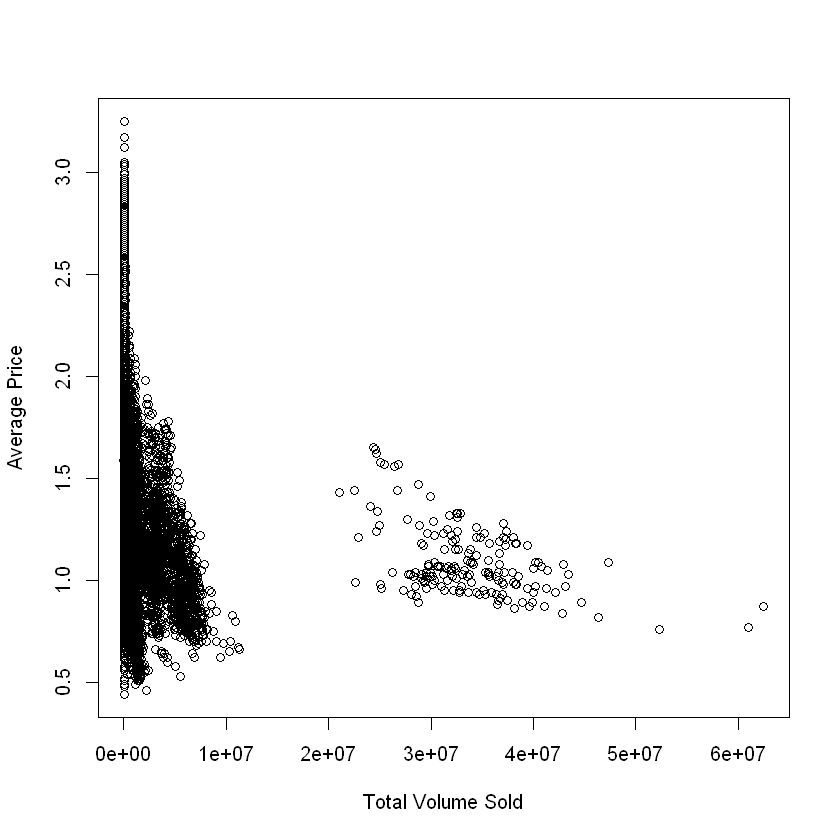

In [46]:
# scatter plot of avocado prices vs. total volume sold
plot(avocado_data$Total.Volume, avocado_data$AveragePrice, xlab = "Total Volume Sold", ylab = "Average Price")

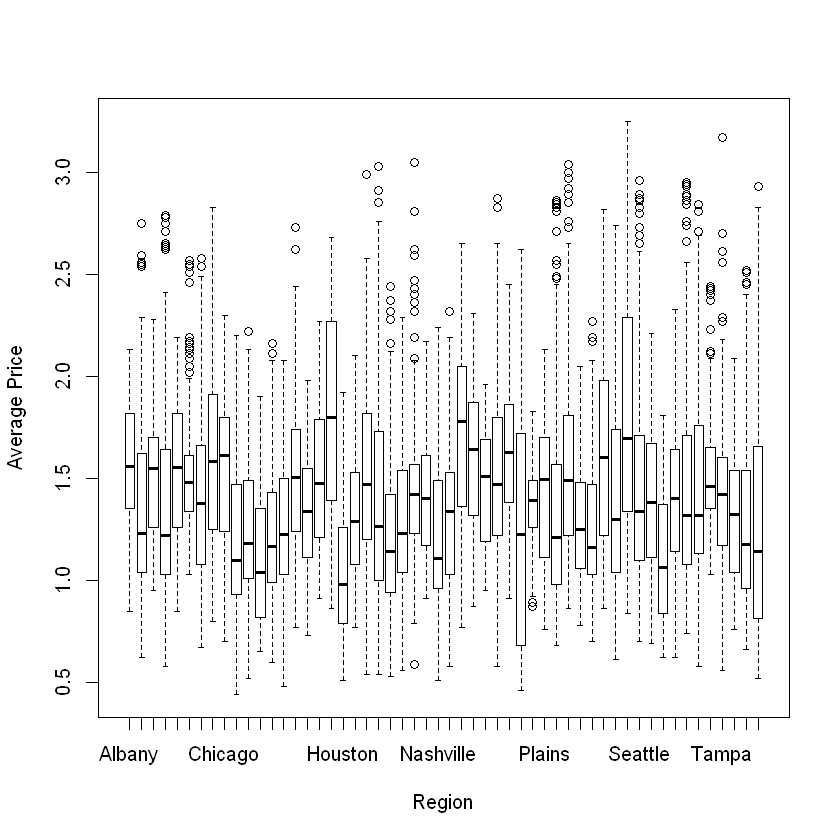

In [47]:
# box plot of avocado prices by region
boxplot(AveragePrice ~ region, data = avocado_data, xlab = "Region", ylab = "Average Price")

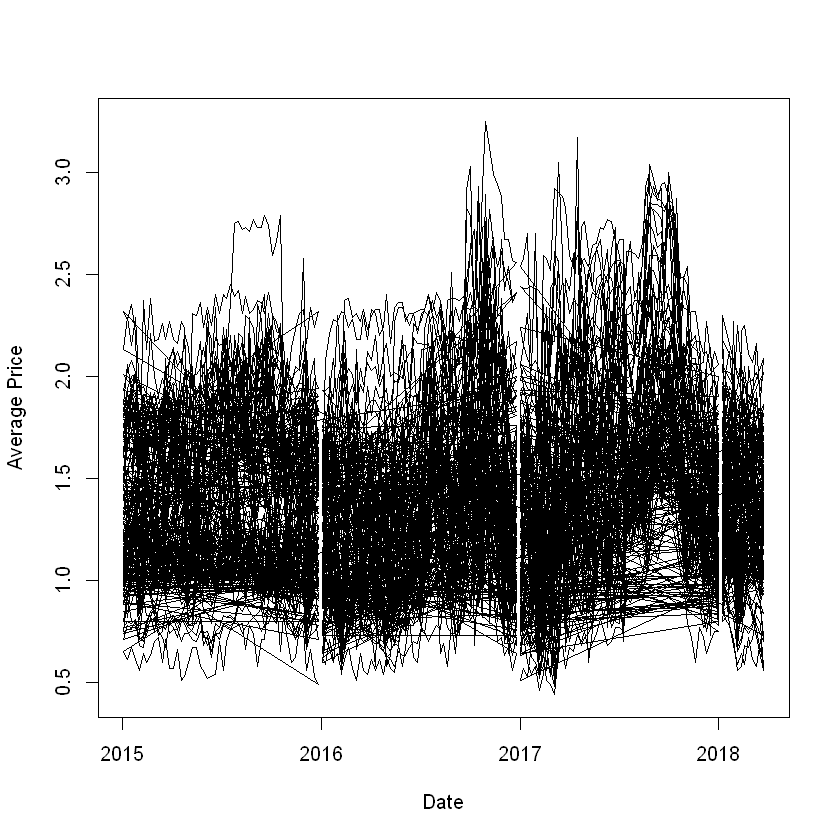

In [48]:
# Convert the Date column to a date format
avocado_data$Date <- as.Date(avocado_data$Date, "%Y-%m-%d")
# time series plot of avocado prices
plot(avocado_data$Date, avocado_data$AveragePrice, xlab = "Date", ylab = "Average Price", type = "l")


regions

In [49]:
# ANOVA to test for differences in avocado prices across regions
avocado_anova <- aov(AveragePrice ~ region, data = avocado_data)
summary(avocado_anova)
# Tukey's HSD test to compare avocado prices between regions
TukeyHSD(avocado_anova)


               Df Sum Sq Mean Sq F value Pr(>F)    
region         53  497.5   9.386   69.38 <2e-16 ***
Residuals   18195 2461.4   0.135                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = AveragePrice ~ region, data = avocado_data)

$region
                                                diff           lwr
Atlanta-Albany                          -0.223076923 -0.3370570346
BaltimoreWashington-Albany              -0.026804734 -0.1407848452
Boise-Albany                            -0.212899408 -0.3268795198
Boston-Albany                           -0.030147929 -0.1441280405
BuffaloRochester-Albany                 -0.044201183 -0.1581812949
California-Albany                       -0.165710059 -0.2796901707
Charlotte-Albany                         0.045000000 -0.0689801115
Chicago-Albany                          -0.004260355 -0.1182404665
CincinnatiDayton-Albany                 -0.351834320 -0.4658144310
Columbus-Albany                         -0.308254438 -0.4222345494
DallasFtWorth-Albany                    -0.475443787 -0.5894238985
Denver-Albany                           -0.34245

In [50]:
# Kruskal-Wallis test to test for differences in avocado prices across regions
kruskal.test(AveragePrice ~ region, data = avocado_data)


	Kruskal-Wallis rank sum test

data:  AveragePrice by region
Kruskal-Wallis chi-squared = 2972.8, df = 53, p-value < 2.2e-16


In [51]:
# Subset the dataset to only include data from two specific regions
avocado_region <- subset(avocado_data, region %in% c("California", "West"))
# two-sample t-test to test for differences in avocado prices between two regions
t.test(AveragePrice ~ region, data = avocado_region)


	Welch Two Sample t-test

data:  AveragePrice by region
t = 4.0564, df = 673.73, p-value = 5.567e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.0635168 0.1826962
sample estimates:
mean in group California       mean in group West 
                1.395325                 1.272219 


In [52]:
# Subset the dataset to only include data from two specific regions
avocado_region <- subset(avocado_data, region %in% c("California", "West"))
# Mann-Whitney U-test to test for differences in avocado prices between two regions
wilcox.test(AveragePrice ~ region, data = avocado_region)



	Wilcoxon rank sum test with continuity correction

data:  AveragePrice by region
W = 68704, p-value = 5.068e-06
alternative hypothesis: true location shift is not equal to 0


In [53]:
# contingency table of region and type
cont_table <- table(avocado_data$region, avocado_data$type)
# chi-square test to test for differences in avocado types sold across regions
chisq.test(cont_table)



	Pearson's Chi-squared test

data:  cont_table
X-squared = 0.026372, df = 53, p-value = 1


years

In [55]:
# ANOVA to test for differences in avocado prices across years
anova_model <- aov(AveragePrice ~ year, data = avocado_data)
summary(anova_model)


               Df Sum Sq Mean Sq F value Pr(>F)    
year            1   25.7  25.700   159.9 <2e-16 ***
Residuals   18247 2933.2   0.161                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [56]:
# Convert "year" into a factor variable
avocado_data$year <- as.factor(avocado_data$year)
# ANOVA to test for differences in avocado prices across years
anova_model <- aov(AveragePrice ~ year, data = avocado_data)
summary(anova_model)
# Tukey's HSD test to determine which years are significantly different from each other
tukey_test <- TukeyHSD(anova_model)
tukey_test

               Df Sum Sq Mean Sq F value Pr(>F)    
year            3  103.2   34.42   219.9 <2e-16 ***
Residuals   18245 2855.6    0.16                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = AveragePrice ~ year, data = avocado_data)

$year
                  diff         lwr          upr     p adj
2016-2015 -0.036950782 -0.05613349 -0.017768076 0.0000045
2017-2015  0.139537195  0.12044353  0.158630862 0.0000000
2018-2015 -0.028059519 -0.05938387  0.003264837 0.0976911
2017-2016  0.176487977  0.15739517  0.195580786 0.0000000
2018-2016  0.008891263 -0.02243257  0.040215095 0.8853849
2018-2017 -0.167596714 -0.19886610 -0.136327329 0.0000000
